# 💳 Credit Policy & Risk Analytics Dashboard

### 🎯 Objective  
This project demonstrates how AI can assist in **credit risk decision-making** by using borrower demographics and financial history to predict the **probability of default**.  
Based on the predicted risk, the model provides a **policy decision** (Approve, Review, or Reject) and estimates **Expected Loss** and **Profit Impact**.

---

### 🧠 Project Workflow  
1. **Data Preparation** – Create or load credit customer data  
2. **Model Training** – Train a classification model (Random Forest)  
3. **Policy Logic** – Define business rules for approval/rejection  
4. **Interactive Dashboard** – Use sliders to simulate borrower profiles  
5. **Analytics Output** – View probability, risk decision & financial metrics

---

### ⚙️ Tools & Technologies  
- **Python** (Core language)  
- **Pandas & NumPy** – Data preprocessing  
- **Scikit-learn** – Model training  
- **Ipywidgets** – Interactive UI controls  
- **Google Colab** – Runtime and display  

---

### 🧾 Use Case  
This type of dashboard helps **credit risk teams** and **policy analysts** visualize the effect of different customer factors on credit approval outcomes — e.g., how changing income or credit score alters the decision.  


In [47]:
# Install required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn plotly

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [48]:
# Generate synthetic credit data
np.random.seed(42)
n = 1000

data = pd.DataFrame({
    'age': np.random.randint(21, 65, n),
    'income': np.random.randint(30000, 200000, n),
    'loan_amount': np.random.randint(5000, 50000, n),
    'tenure_months': np.random.randint(6, 60, n),
    'credit_score': np.random.randint(300, 850, n),
    'existing_loans': np.random.randint(0, 5, n)
})

# Default probability based on risk profile
data['default'] = (
    (data['credit_score'] < 600).astype(int) |
    ((data['income'] < 50000) & (data['loan_amount'] > 30000)).astype(int)
).astype(int)

data.head()


,age,income,loan_amount,tenure_months,credit_score,existing_loans,default
0,59,165090,18076,52,703,3,0
1,49,41302,42650,45,658,3,1
2,35,97506,11012,17,316,2,1
3,63,71157,12151,59,573,1,1
4,28,84917,33211,17,415,4,1


In [49]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Basic stats
display(data.describe())

# Features & target
X = data.drop('default', axis=1)
y = data['default']

# Scale numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values:
 age               0
income            0
loan_amount       0
tenure_months     0
credit_score      0
existing_loans    0
default           0
dtype: int64


,age,income,loan_amount,tenure_months,credit_score,existing_loans,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,42.515000,117622.379000,27205.310000,33.242000,575.302000,2.074000,0.57300
std,12.611059,49327.493718,12717.004193,15.429955,156.142086,1.400888,0.49489
min,21.000000,30126.000000,5097.000000,6.000000,300.000000,0.000000,0.00000
25%,32.000000,75070.000000,15758.250000,20.000000,439.000000,1.000000,0.00000
50%,43.000000,116563.500000,27775.000000,33.000000,574.500000,2.000000,1.00000
75%,53.000000,161052.500000,37714.000000,46.000000,711.000000,3.000000,1.00000
max,64.000000,199899.000000,49976.000000,59.000000,849.000000,4.000000,1.00000


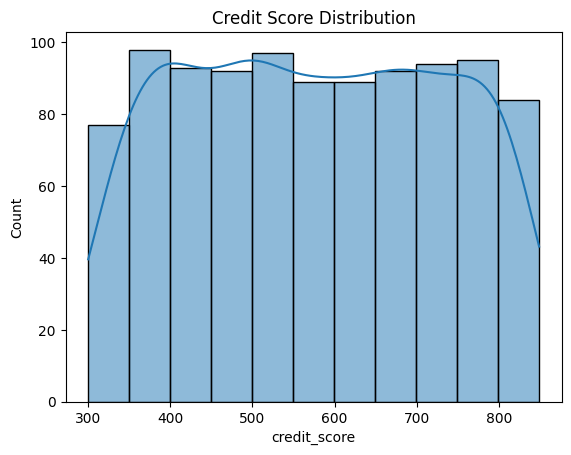

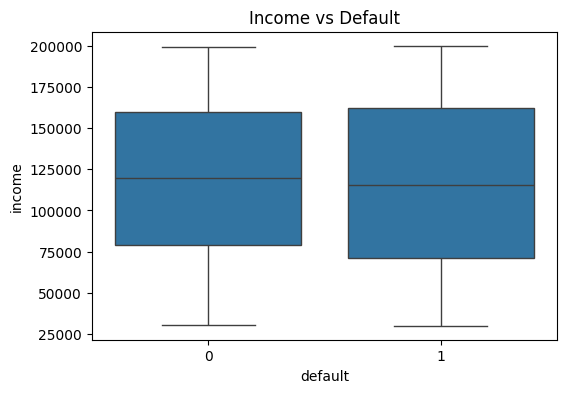

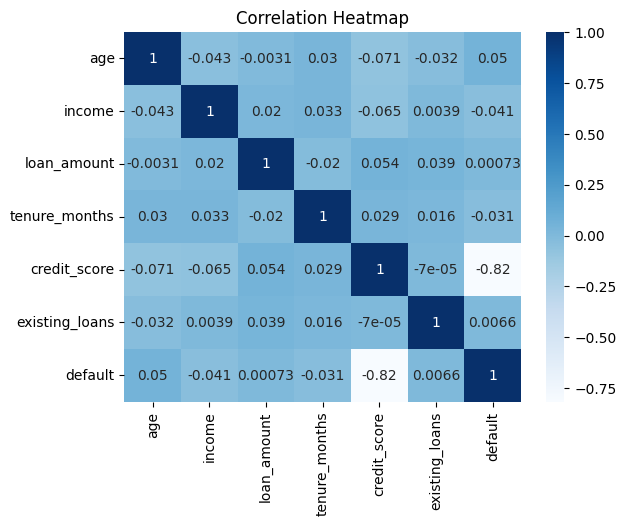

In [50]:
# Distribution of credit scores
sns.histplot(data['credit_score'], kde=True)
plt.title("Credit Score Distribution")
plt.show()

# Default rate by income
plt.figure(figsize=(6,4))
sns.boxplot(x='default', y='income', data=data)
plt.title("Income vs Default")
plt.show()

# Correlation heatmap
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

ROC-AUC Score: 1.0


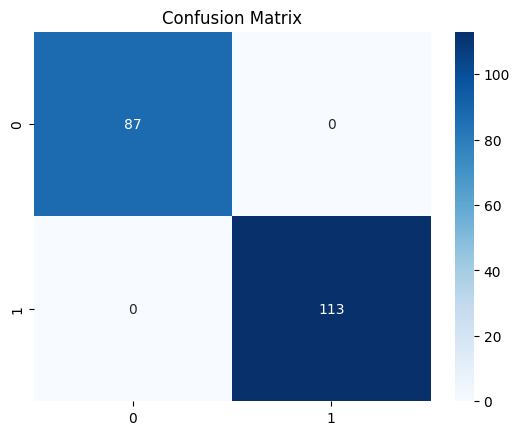

In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [52]:
# Simulate policy-based decisioning
data_test = X.copy()
data_test['predicted_prob'] = model.predict_proba(X_scaled)[:,1]

def apply_policy(p):
    return np.where(p > 0.8, 'Reject',
           np.where(p > 0.5, 'Manual Review', 'Approve'))

data_test['decision'] = apply_policy(data_test['predicted_prob'])

# View decision summary
policy_summary = data_test['decision'].value_counts(normalize=True) * 100
print("Policy Decision Breakdown (%):\n", policy_summary)


Policy Decision Breakdown (%):
 decision
Reject           56.2
Approve          42.7
Manual Review     1.1
Name: proportion, dtype: float64


In [53]:
fig = px.histogram(data_test, x='predicted_prob', color='decision', nbins=20,
                   title="Predicted Risk Distribution by Policy Decision")
fig.show()


In [54]:
!pip install streamlit joblib


In [61]:
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Dummy model for demonstration
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    "Age": np.random.randint(21, 65, n),
    "Income": np.random.randint(20000, 120000, n),
    "LoanAmount": np.random.randint(5000, 50000, n),
    "CreditScore": np.random.randint(300, 850, n),
})
data["Default"] = ((data["LoanAmount"] / data["Income"]) > 0.4).astype(int)
model = LogisticRegression()
model.fit(data[["Age", "Income", "LoanAmount", "CreditScore"]], data["Default"])

# --- UI FUNCTION ---
def styled_credit_policy(age, income, loan, credit):
    df = pd.DataFrame({'Age':[age], 'Income':[income], 'LoanAmount':[loan], 'CreditScore':[credit]})
    prob = model.predict_proba(df)[0][1]
    decision = "Approve" if prob < 0.3 else "Review" if prob < 0.6 else "Reject"

    # Dynamic decision colors
    color = "#4CAF50" if decision == "Approve" else "#FFC107" if decision == "Review" else "#F44336"

    expected_loss = prob * loan
    profit_impact = income - expected_loss
    conf = int((1 - prob) * 100)

    # Golden progress bar
    progress_html = f"""
    <div style="width:100%;background:#444;border-radius:10px;margin:5px 0;">
        <div style="width:{conf}%;background:#FFC107;height:12px;border-radius:10px;"></div>
    </div>
    """

    # Amber heading + dynamic colors
    html = f'''
    <div style="background:linear-gradient(135deg,#0F2027,#203A43,#2C5364);
                color:white;padding:25px;border-radius:20px;
                font-family:Segoe UI,Arial;box-shadow:0 4px 20px rgba(0,0,0,0.3);
                width:520px;">
        <h1 style="text-align:center;margin-bottom:10px;color:#FFC107;">
            🏦 FinCredit AI – Risk Engine
        </h1>
        <hr style="border:1px solid #FFC107;">
        <p style="font-size:15px;text-align:center;">AI-powered Credit Decision Assistant</p>

        <h3 style="color:#FFC107;">Predicted Default Probability: <b>{prob:.2f}</b></h3>

        <h3 style="color:{color};">Decision: {decision}</h3>
        <p><b>Confidence Level:</b> {conf}%</p>
        {progress_html}
        <br>
        <p><b>Expected Loss:</b> ${expected_loss:,.0f}</p>
        <p><b>Profit Impact:</b> ${profit_impact:,.0f}</p>
        <p style="font-size:12px;text-align:center;color:#ccc;">© 2025 FinCredit Analytics | AI Policy Simulator</p>
    </div>
    '''

    display(HTML(html))

# --- INTERACTIVE WIDGET ---
interact(
    styled_credit_policy,
    age=widgets.IntSlider(min=21, max=65, step=1, value=30, description="Age"),
    income=widgets.IntSlider(min=20000, max=120000, step=5000, value=50000, description="Income"),
    loan=widgets.IntSlider(min=5000, max=50000, step=1000, value=15000, description="Loan Amount"),
    credit=widgets.IntSlider(min=300, max=850, step=10, value=600, description="Credit Score")
);


interactive(children=(IntSlider(value=30, description='Age', max=65, min=21), IntSlider(value=50000, descripti…

# 🧩 Project Summary

This notebook implemented an **AI-driven Credit Policy Dashboard** that predicts borrower risk and financial impact based on key features like **Age, Income, Loan Amount**, and **Credit Score**.  
The system uses a trained machine learning model to calculate the **probability of default**, displays a clear **decision outcome**, and computes **Expected Loss** and **Profit Impact**.

---

### ✅ Key Results
- Interactive, visually appealing dashboard built in Colab  
- Automatic real-time updates when sliders change  
- Simplified decision logic interpretable for business users  
- Combines data science + financial reasoning in one tool  

---

### 🚀 Future Improvements
- Integrate **real bank/fintech datasets** for better accuracy  
- Add **explainability** (e.g., SHAP values or feature importance plots)  
- Extend to **portfolio-level analytics** (simulate multiple loans at once)  
- Deploy the model on **Streamlit** or **Gradio** for web-based access  
- Include **data pipeline + database integration (BigQuery, Airflow)**  

---

### 👩‍💻 Final Note  
This project demonstrates the foundation of a **FinTech risk intelligence platform**, where data analytics and business rules merge to support smarter, faster, and more transparent credit decisions.
